###Import everything that we need

In [83]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_wine
from sklearn.preprocessing import  MinMaxScaler #because we have not got negative number


###Recall dataset

In [84]:
# load our dataset
data = load_wine().data
target = load_wine().target

#features name| targets name
f_name = load_wine().feature_names
f_targets = load_wine().target_names

In [85]:
#convert to DataFrame
df = pd.DataFrame(data , columns=f_name)


###EDA

In [86]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [87]:
df.shape

(178, 13)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [89]:
#not existing categorical leads to not seperate theis method
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


####Null handling

In [90]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


####duplication

In [91]:
df.duplicated().sum()

0

####Outlier Handling

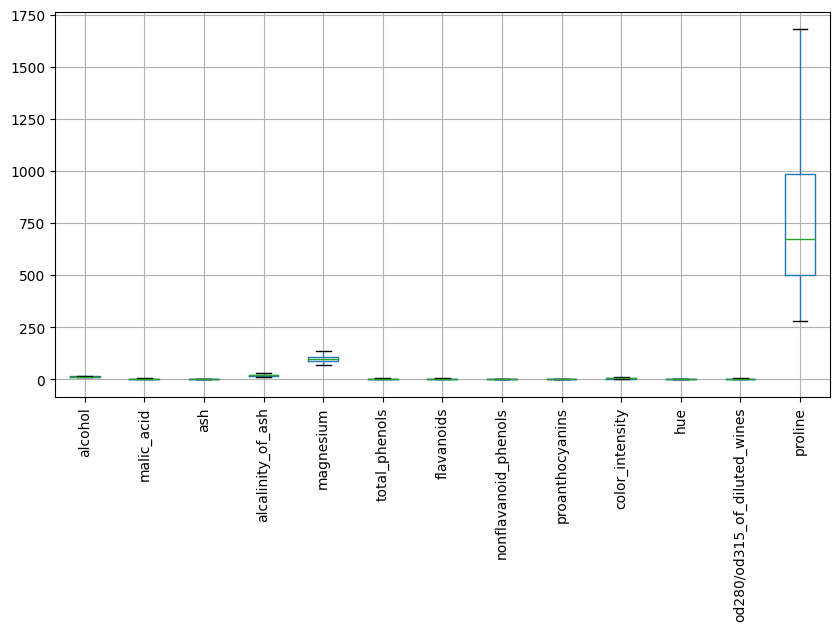

In [51]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [52]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Example usage:
calculate_outliers_percentage(df)

Percentage of outliers in alcohol: 0.00%
Percentage of outliers in malic_acid: 0.00%
Percentage of outliers in ash: 0.00%
Percentage of outliers in alcalinity_of_ash: 0.00%
Percentage of outliers in magnesium: 0.00%
Percentage of outliers in total_phenols: 0.00%
Percentage of outliers in flavanoids: 0.00%
Percentage of outliers in nonflavanoid_phenols: 0.00%
Percentage of outliers in proanthocyanins: 0.00%
Percentage of outliers in color_intensity: 0.00%
Percentage of outliers in hue: 0.00%
Percentage of outliers in od280/od315_of_diluted_wines: 0.00%
Percentage of outliers in proline: 0.00%


In [53]:
def handle_outliers(df):
    for column in df:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply to both training and test datasets
df = handle_outliers(df)

In [54]:
calculate_outliers_percentage(df)

Percentage of outliers in alcohol: 0.00%
Percentage of outliers in malic_acid: 0.00%
Percentage of outliers in ash: 0.00%
Percentage of outliers in alcalinity_of_ash: 0.00%
Percentage of outliers in magnesium: 0.00%
Percentage of outliers in total_phenols: 0.00%
Percentage of outliers in flavanoids: 0.00%
Percentage of outliers in nonflavanoid_phenols: 0.00%
Percentage of outliers in proanthocyanins: 0.00%
Percentage of outliers in color_intensity: 0.00%
Percentage of outliers in hue: 0.00%
Percentage of outliers in od280/od315_of_diluted_wines: 0.00%
Percentage of outliers in proline: 0.00%


####Visualization for EDA

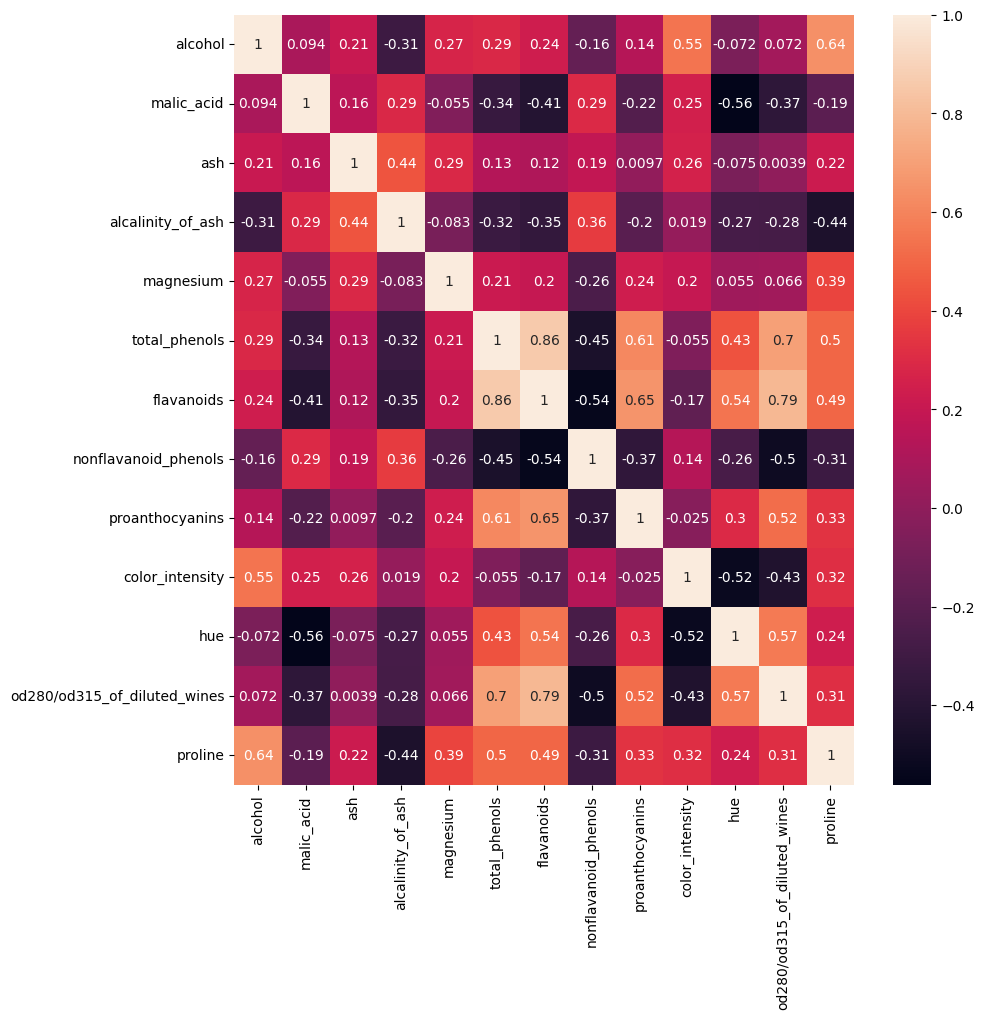

In [92]:
#Colloration
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True);

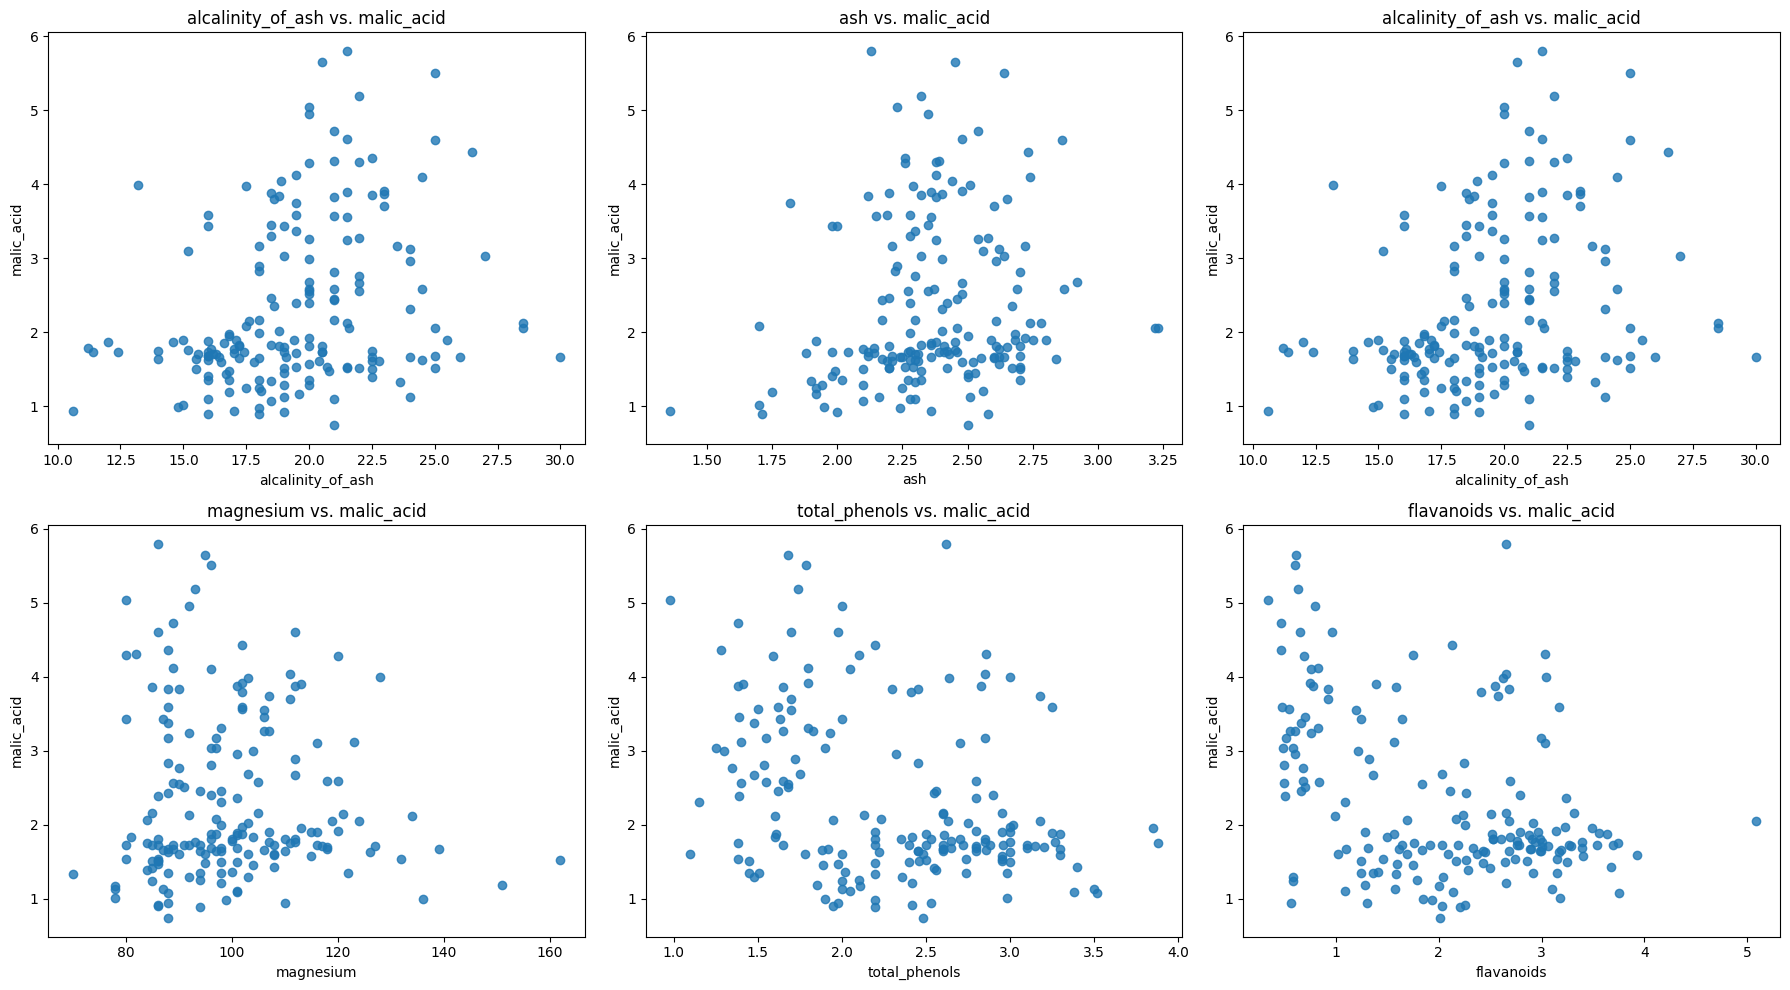

In [93]:
#Subplot
feature_pairs = [
    ('alcalinity_of_ash', 'malic_acid'),
    ('ash', 'malic_acid'),
    ('alcalinity_of_ash', 'malic_acid'),
    ('magnesium', 'malic_acid'),
    ('total_phenols', 'malic_acid'),
    ('flavanoids', 'malic_acid')
]

# Create the subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot the scatter plots
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    axes[i].scatter(df[x_feature], df[y_feature], alpha=0.8)
    axes[i].set_title(f'{x_feature} vs. {y_feature}')
    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)

plt.tight_layout()
plt.show()

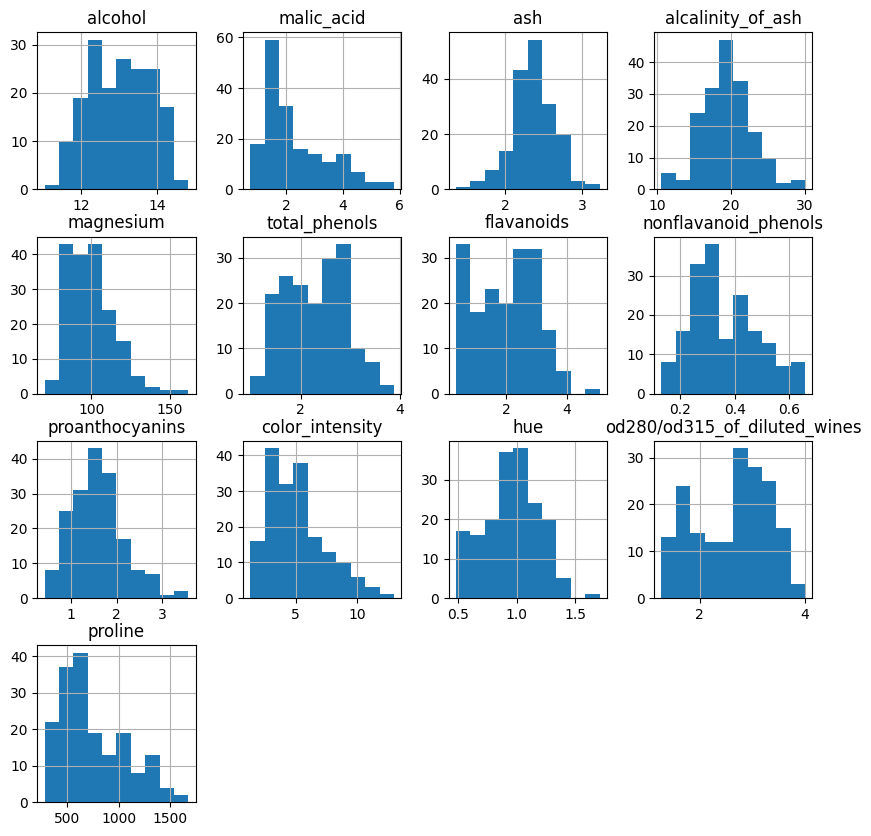

In [94]:
df.hist(figsize=(10,10));

####Skewness

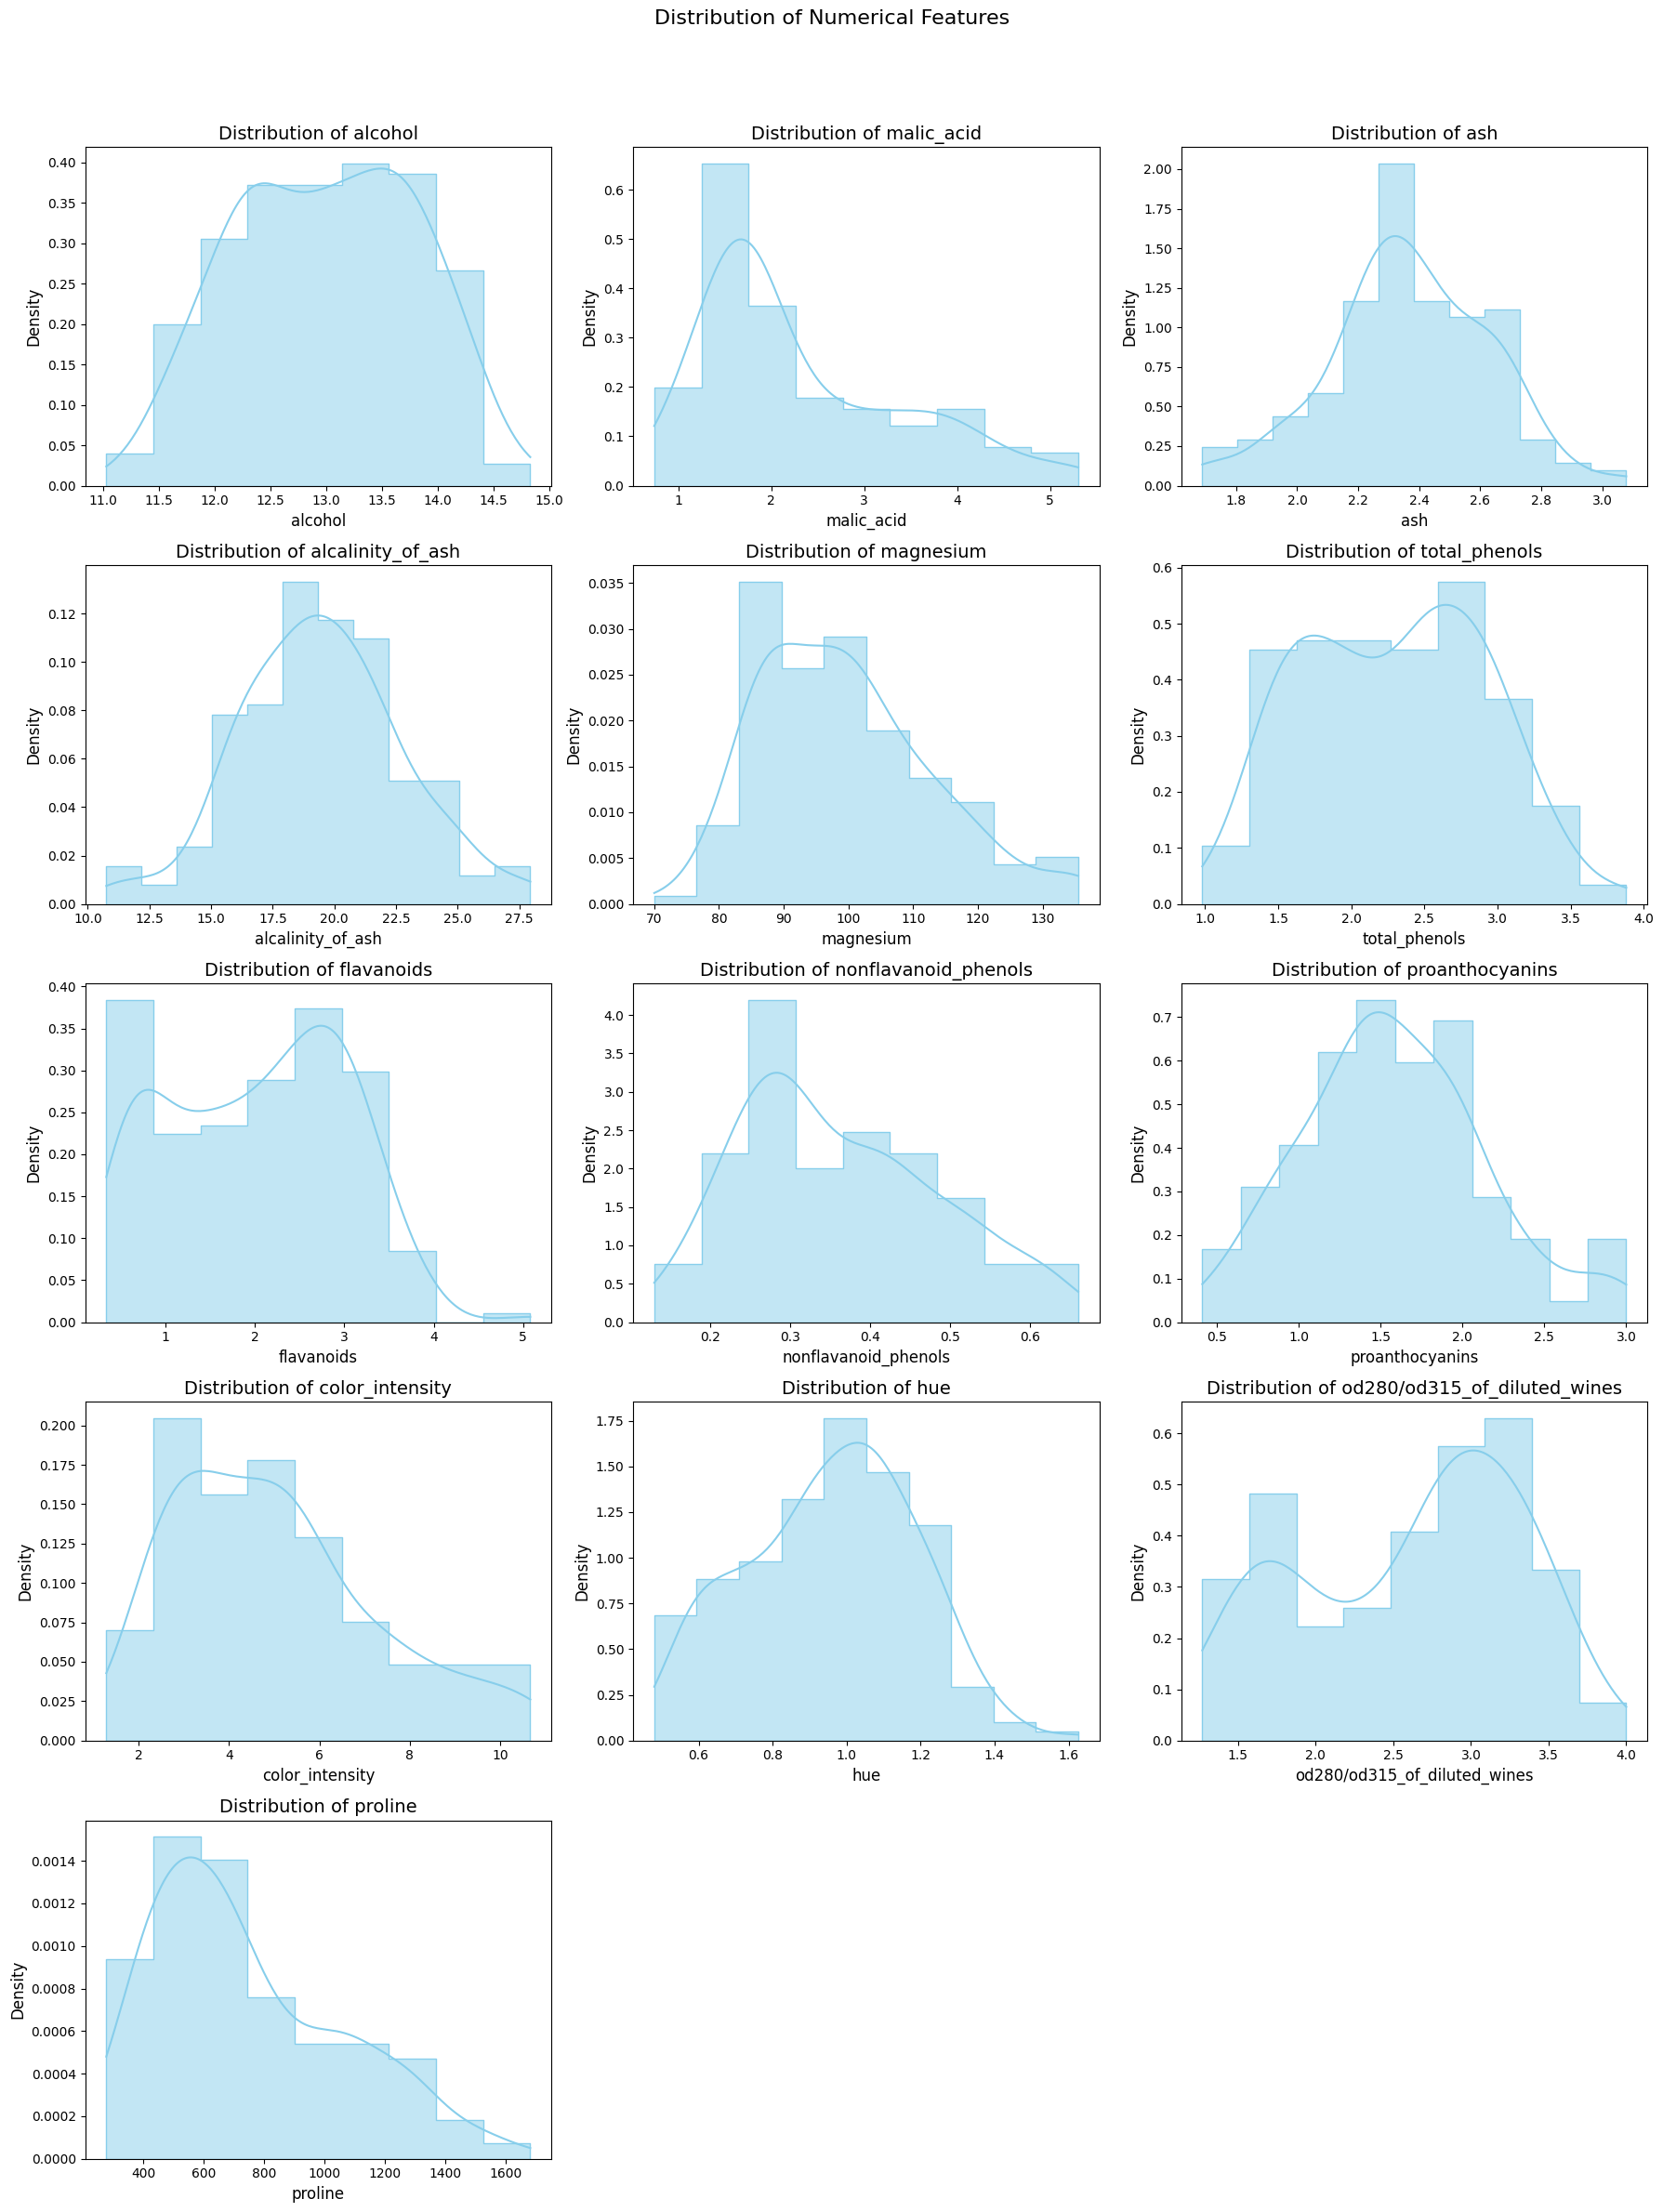

In [58]:
### Skewness analysis
def visualize_numerical_distributions(df, exclude_columns='id'):

    # Identify numerical columns (excluding specified columns)
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != exclude_columns]

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a histogram with KDE
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()


visualize_numerical_distributions(df)

In [59]:
from scipy import stats

def robust_skewness_handler(df, threshold=0.5):
    transformed_df = df.copy()
    transformation_dict = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        skewness = data.skew()

        if abs(skewness) > threshold:
            print(f"Handling skewness for {col} (skewness: {skewness:.2f})")

            # Handle zero-inflated or near-zero-inflated data
            if (data == 0).sum() / len(data) > 0.1:  # If more than 10% zeros
                non_zero = data[data != 0]
                if len(non_zero) > 0:
                    log_transform = np.log1p(non_zero)
                    transformed_df.loc[data != 0, col] = log_transform
                    transformation_dict[col] = ('log1p', 'zero-inflated')
                    print(f"  Applied Log1p to non-zero values for {col}")
                continue

            # Try Box-Cox transformation
            min_val = data.min()
            if min_val <= 0:
                shift = abs(min_val) + 1
                shifted_data = data + shift
            else:
                shifted_data = data

            try:
                transformed_data, lambda_param = stats.boxcox(shifted_data)
                transformed_df[col] = transformed_data
                transformation_dict[col] = ('box-cox', lambda_param)
                print(f"  Applied Box-Cox to {col} (lambda: {lambda_param:.2f})")
            except:
                # If Box-Cox fails, try other transformations
                if skewness > 0:  # Right-skewed
                    if data.max() / data.min() > 1000:  # Very large range
                        transformed_df[col] = np.log1p(data)
                        transformation_dict[col] = ('log1p', None)
                        print(f"  Applied Log1p to {col}")
                    else:
                        transformed_df[col] = np.sqrt(data)
                        transformation_dict[col] = ('sqrt', None)
                        print(f"  Applied Square Root to {col}")
                else:  # Left-skewed
                    transformed_df[col] = data ** 2
                    transformation_dict[col] = ('square', None)
                    print(f"  Applied Square to {col}")

    return transformed_df, transformation_dict

# Example usage:
transformed_df, transformations = robust_skewness_handler(df)

Handling skewness for malic_acid (skewness: 0.97)
  Applied Box-Cox to malic_acid (lambda: -0.26)
Handling skewness for magnesium (skewness: 0.67)
  Applied Box-Cox to magnesium (lambda: -1.06)
Handling skewness for color_intensity (skewness: 0.74)
  Applied Box-Cox to color_intensity (lambda: 0.12)
Handling skewness for proline (skewness: 0.77)
  Applied Box-Cox to proline (lambda: -0.10)


In [60]:
df = pd.DataFrame(transformed_df)

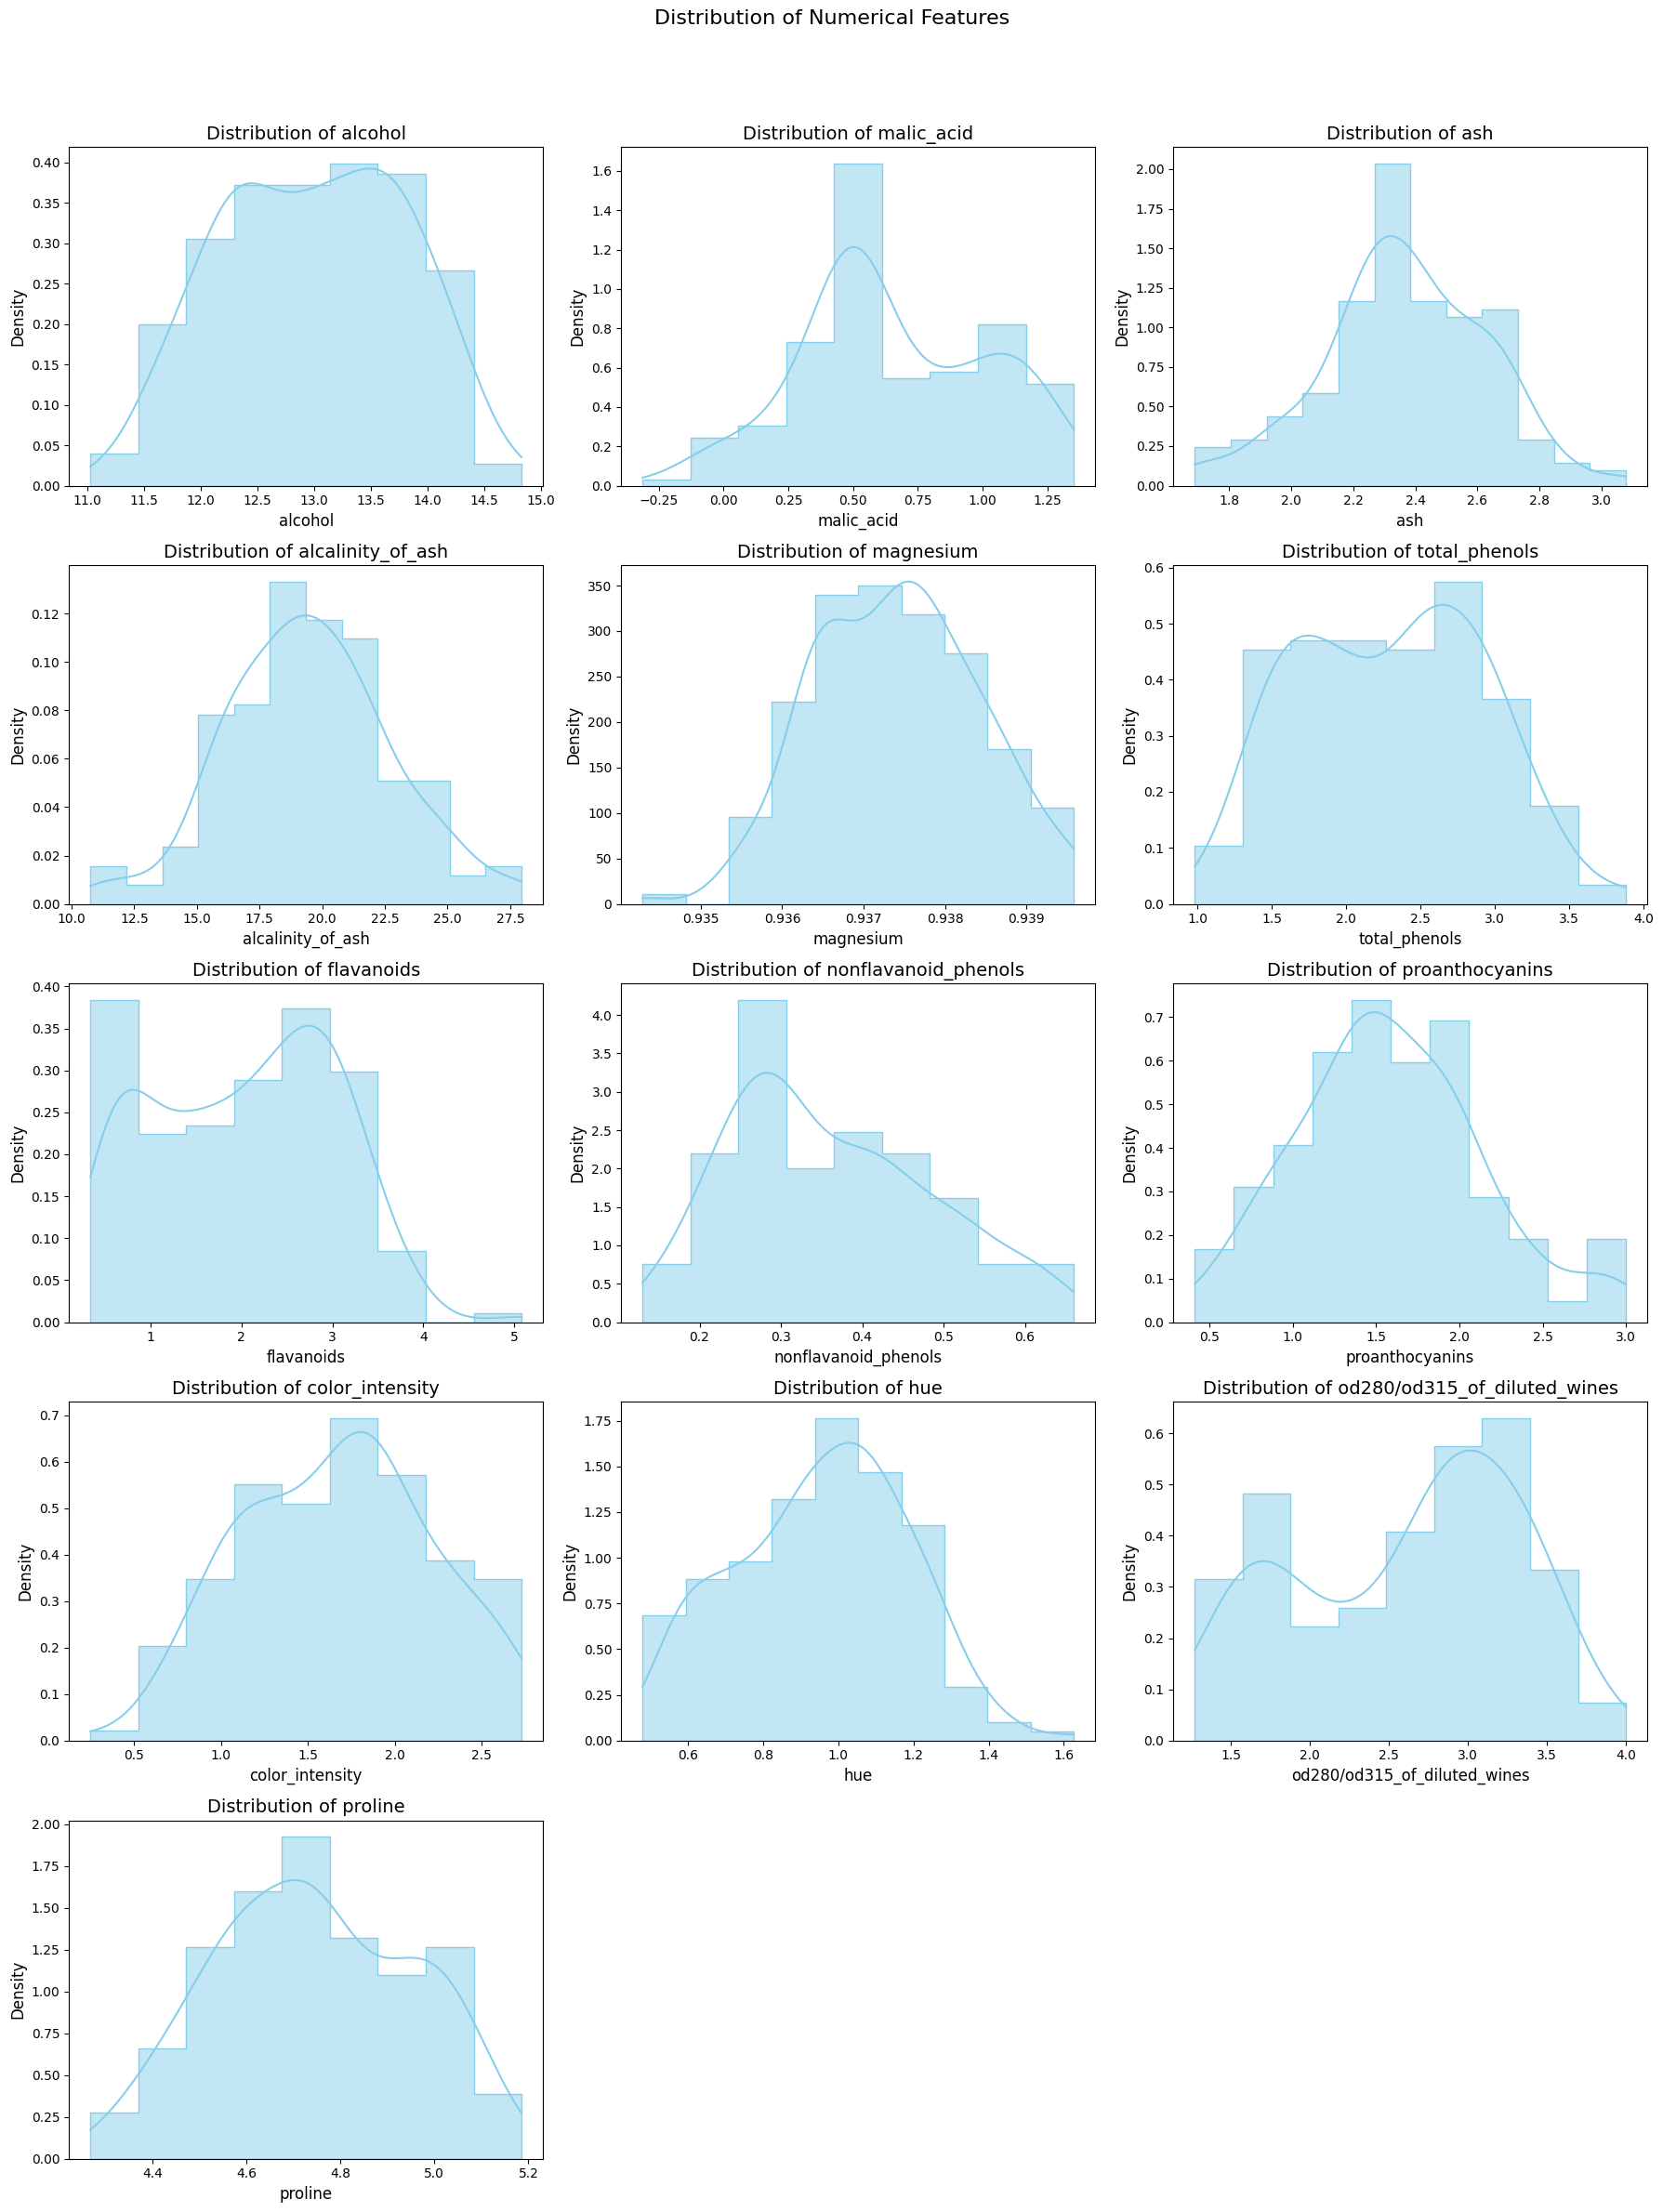

In [61]:
visualize_numerical_distributions(df)

###Regression

####Preprocessing

In [95]:
# Categorical to numerical --> not valid for this dataset
#train_test splite
y = df["malic_acid"]
X = df.drop('malic_acid' , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , shuffle=True)

In [96]:
#scale the feature
#scale the feature
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) # Learn scaling from training data and transform it
X_test = mms.transform(X_test) # Apply the SAME scaling to the test data

####Train Model

In [103]:

# train the model
for i in range(2,20):
    knn_reg = KNeighborsRegressor(n_neighbors=i, metric="euclidean")
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'n_neighbors: {i}, r2: {r2}')


n_neighbors: 2, r2: 0.28942151805931815
n_neighbors: 3, r2: 0.25474577934916365
n_neighbors: 4, r2: 0.350780036191189
n_neighbors: 5, r2: 0.372012825011407
n_neighbors: 6, r2: 0.366809178133055
n_neighbors: 7, r2: 0.3598470455564379
n_neighbors: 8, r2: 0.34592205237294094
n_neighbors: 9, r2: 0.33586186732606493
n_neighbors: 10, r2: 0.3128326099981873
n_neighbors: 11, r2: 0.3191418013480166
n_neighbors: 12, r2: 0.31554123400004874
n_neighbors: 13, r2: 0.3166103232184496
n_neighbors: 14, r2: 0.33421182097493096
n_neighbors: 15, r2: 0.3362381834487287
n_neighbors: 16, r2: 0.3508811441601629
n_neighbors: 17, r2: 0.3535733313710525
n_neighbors: 18, r2: 0.34845885914995633
n_neighbors: 19, r2: 0.33861520482425034


In [104]:
y_pred = knn_reg.predict(X_test)

In [105]:
Compare = pd.DataFrame({"Actual" : y_test , "Prediction" : y_pred.flatten()})
Compare

,Actual,Prediction
157,3.03,3.307895
3,1.95,1.977368
147,4.61,3.193158
140,2.81,3.331053
91,1.51,2.100000
144,3.88,2.875789
15,1.81,1.792105
129,4.30,1.926316
55,1.73,2.040000
113,0.74,1.869474


In [106]:

# evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')


R2: 0.33861520482425034
MSE: 1.10009459833795
MAE: 0.7977485380116959
